In [43]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

house_data = fetch_california_housing()

X = pd.DataFrame(house_data.data, columns=house_data.feature_names)
y = (house_data.target < 2).astype(int)


array([0, 0, 0, ..., 1, 1, 1])

In [47]:
print(X.head())
print('Features:', house_data.feature_names)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X,y)

importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': house_data.feature_names,'Importance': importance}).sort_values('Importance',ascending=False)
print(feature_importance)

      Feature  Importance
0      MedInc    0.380512
7   Longitude    0.144037
5    AveOccup    0.136659
6    Latitude    0.126072
2    AveRooms    0.065303
1    HouseAge    0.054586
4  Population    0.049714
3   AveBedrms    0.043117


Text(0.5, 0, 'Feature')

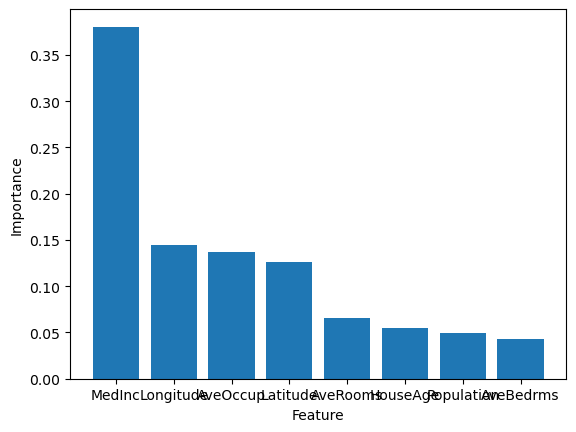

In [75]:
import matplotlib.pyplot as plt

plt.bar(feature_importance['Feature'],feature_importance['Importance'])
plt.ylabel('Importance')
plt.xlabel('Feature')

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

important_features = feature_importance[feature_importance['Importance'] > 0.1]['Feature'].tolist()
X_reduced = X[important_features]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)
model_reduced = DecisionTreeClassifier(random_state=42)
model_reduced.fit(X_train, y_train)
predictions = model_reduced.predict(X_test)
print("Accuracy with reduced features:", accuracy_score(y_test, predictions))

Accuracy with reduced features: 0.8473837209302325


In [91]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_all = DecisionTreeClassifier(random_state=42)
model_all.fit(X_train_all, y_train)
predictions_all = model_all.predict(X_test_all)
print("Accuracy with all features:", accuracy_score(y_test, predictions_all))

Accuracy with all features: 0.8280038759689923


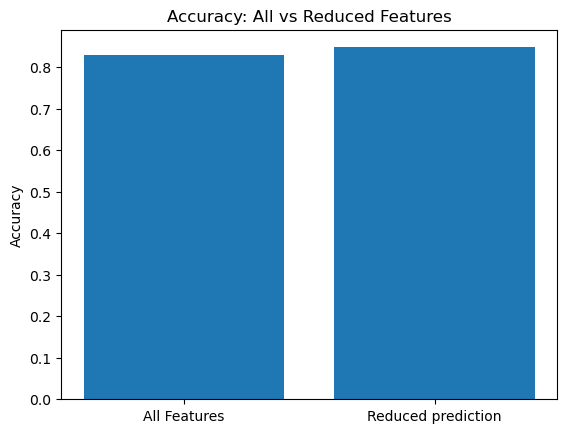

In [99]:
accuracies = {'All Features': accuracy_score(y_test,predictions_all), 'Reduced prediction': accuracy_score(y_test,predictions)}
plt.bar(accuracies.keys(), accuracies.values())
plt.title("Accuracy: All vs Reduced Features")
plt.ylabel("Accuracy")
plt.show()